In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re                          
import time
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")
Model=[]
Mileage=[]
Final_Price=[]
MSRP=[]
Price_Drop=[]
Dealer=[]
Rating=[]
Number_of_Reviews=[]
Brand=[]

lst=["audi","bmw","ford","mercedes-benz","hyundai","tesla","cadillac","porsche","bentley","bugatti","ferrari","chevrolet","honda","kia","nissan","toyota","volkswagen","fiat","rolls-royce","maserati","jeep","volvo"]



for j in lst:

   URL="https://www.cars.com/shopping/results/?page=12&page_size=20&list_price_max=&makes[]="+j+"&maximum_distance=all&models[]=&stock_type=all&zip="
   page=requests.get(URL)
   #print(page.status_code)
   page_content=page.content
   soup_content=BeautifulSoup(page_content,'html.parser')   

   for each in soup_content.find_all('div',{'class':'vehicle-card'}):

      model=each.find('h2',{'class':'title'})
      mileage=each.find('div',{'class':'mileage'})
      final_price=each.find('span',{'class':'primary-price'})
      msrp=each.find('span',{'class':'secondary-price'})
      price_drop=each.find('span',{'class':'secondary-price price-drop'})
      dealer=each.find('div',{'class':'dealer-name'})
      #EMI=each.find('span',{'class':'js-estimated-monthly-payment-formatted-value-with-abr'})
      rating=each.find('span',{'class':'sds-rating__count'})
      number_of_reviews=each.find('span',{'class':'sds-rating__link'})
    
      Brand.append(j.capitalize())
      
      if model is None:
       Model.append(np.NaN)
      else:
       Model.append(model.text)

      if mileage is None:
       Mileage.append(np.NaN)
      else:
       Mileage.append(mileage.text)

      if  final_price is None:
       Final_Price.append(np.NaN)
      else:
       Final_Price.append( final_price.text)

      if msrp is None:
       MSRP.append(np.NaN)
      else:
       MSRP.append(msrp.text)

      if price_drop is None:
       Price_Drop.append(np.NaN)
      else:
       Price_Drop.append(price_drop.text)

      if dealer is None:
       Dealer.append(np.NaN)
      else:
       Dealer.append(dealer.text.strip())

      if rating is None:
       Rating.append(np.NaN)
      else:
       Rating.append(rating.text)

      if number_of_reviews is None:
       Number_of_Reviews.append(np.NaN)
      else:
       Number_of_Reviews.append(number_of_reviews.text)

In [ ]:
for i in range(len(Final_Price)):
    if Final_Price[i] == 'Not Priced':
        Final_Price[i] = np.NAN
  

In [ ]:
cars=pd.DataFrame({"Brand":Brand,"Model":Model,"Mileage":Mileage,"Final Price":Final_Price,"Price Drop":Price_Drop,"Dealer":Dealer,"Rating":Rating,"Number of Reviews": Number_of_Reviews})

In [ ]:
cars.head()

,Brand,Model,Mileage,Final Price,Price Drop,Dealer,Rating,Number of Reviews
0,Audi,2016 Audi A7 3.0T Premium Plus,"67,643 mi.","$29,995",NaN,Freeman Motor Co Salem,NaN,(0 reviews)
1,Audi,2019 Audi RS 3 2.5T,"26,585 mi.","$54,995",NaN,TX Auto Group,4.7,(151 reviews)
2,Audi,2019 Audi A4 2.0T Premium,"27,728 mi.","$29,539",$365 price drop,Bergstrom Luxury on Victory Lane,4.3,(291 reviews)
3,Audi,2020 Audi R8 5.2 V10,"4,805 mi.","$179,999",NaN,Modern Motorcars,4.2,(532 reviews)
4,Audi,2020 Audi S6 2.9T Premium Plus,"26,006 mi.","$58,890",NaN,Mercedes-Benz of Springfield,5.0,(98 reviews)


###Checking duplicated rows and deleting if any

In [ ]:
cars.duplicated().sum()

0

In [ ]:
cars=cars.drop_duplicates(keep="first")

In [ ]:
cars.head()

,Brand,Model,Mileage,Final Price,Price Drop,Dealer,Rating,Number of Reviews
0,Audi,2016 Audi A7 3.0T Premium Plus,"67,643 mi.","$29,995",NaN,Freeman Motor Co Salem,NaN,(0 reviews)
1,Audi,2019 Audi RS 3 2.5T,"26,585 mi.","$54,995",NaN,TX Auto Group,4.7,(151 reviews)
2,Audi,2019 Audi A4 2.0T Premium,"27,728 mi.","$29,539",$365 price drop,Bergstrom Luxury on Victory Lane,4.3,(291 reviews)
3,Audi,2020 Audi R8 5.2 V10,"4,805 mi.","$179,999",NaN,Modern Motorcars,4.2,(532 reviews)
4,Audi,2020 Audi S6 2.9T Premium Plus,"26,006 mi.","$58,890",NaN,Mercedes-Benz of Springfield,5.0,(98 reviews)


In [ ]:
cars.dtypes

Brand                object
Model                object
Mileage              object
Final Price          object
Price Drop           object
Dealer               object
Rating               object
Number of Reviews    object
dtype: object

###Finding the null values percentage

In [ ]:
100*(cars.isnull().sum()/cars.shape[0])

Brand                 0.000000
Model                 0.000000
Mileage              40.837696
Final Price           2.094241
Price Drop           76.439791
Dealer                0.261780
Rating               32.984293
Number of Reviews     3.141361
dtype: float64

In [ ]:
cars.head()

,Brand,Model,Mileage,Final Price,Price Drop,Dealer,Rating,Number of Reviews
0,Audi,2016 Audi A7 3.0T Premium Plus,"67,643 mi.","$29,995",NaN,Freeman Motor Co Salem,NaN,(0 reviews)
1,Audi,2019 Audi RS 3 2.5T,"26,585 mi.","$54,995",NaN,TX Auto Group,4.7,(151 reviews)
2,Audi,2019 Audi A4 2.0T Premium,"27,728 mi.","$29,539",$365 price drop,Bergstrom Luxury on Victory Lane,4.3,(291 reviews)
3,Audi,2020 Audi R8 5.2 V10,"4,805 mi.","$179,999",NaN,Modern Motorcars,4.2,(532 reviews)
4,Audi,2020 Audi S6 2.9T Premium Plus,"26,006 mi.","$58,890",NaN,Mercedes-Benz of Springfield,5.0,(98 reviews)


###Filling null values

  

*   If null_vlues<5%, we can remove the values
*   If null_vlues>40%, drop the column
*   Else, commute the values with meadian mode , mean, max occurring value, etc.






Dropping Price Drop column as the null_values>40%

In [ ]:
cars.drop(axis=1,labels="Price Drop",inplace=True)

Stripping unnecessary words from Mileage Culumn and filling null values

In [ ]:
cars["Mileage"]=cars["Mileage"].astype(str)

In [ ]:
cars["Mileage"]=cars["Mileage"].apply(lambda x:x.strip("mi.)"))

In [ ]:
cars["Mileage"]=cars["Mileage"].str.replace(",","")

In [ ]:
#####cars['Mileage']=cars['Mileage'].fillna(cars['Mileage'].mean(), inplace=True) 

In [ ]:
####cars['Mileage']=cars['Mileage'].fillna(pd.to_numeric(cars['Mileage'], errors='coerce').mean())

In [ ]:
####cars['Mileage']=cars['Mileage'].fillna(pd.to_numeric(cars['Mileage'], errors='coerce').mean())

In [ ]:
#cars['Mileage']=cars['Mileage'].fillna(cars["Mileage"].value_counts().max())

In [ ]:
cars["Mileage"]=cars["Mileage"].astype(float)

In [ ]:
cars["Mileage"].median()

29207.0

In [ ]:
cars['Mileage']=cars['Mileage'].fillna(cars["Mileage"].median())


Filling null values in Rating column

In [ ]:
#cars['Rating']=cars['Rating'].fillna(cars["Rating"].value_counts().max())

In [ ]:

cars["Rating"] = cars["Rating"].astype(float)

In [ ]:

cars["Rating"].median()

4.6

In [ ]:

cars['Rating']=cars['Rating'].fillna(cars["Rating"].median())

Stripping unnecessary words from 'Number of Reviews' Culumn and filling null values

In [ ]:
cars["Number of Reviews"]=cars["Number of Reviews"].astype(str)

In [ ]:
cars["Number of Reviews"]=cars["Number of Reviews"].apply(lambda x:x.strip("reviews)").strip("("))

In [ ]:
cars["Number of Reviews"]=cars["Number of Reviews"].str.replace(",","")

In [ ]:
#cars['Number of Reviews']=cars['Number of Reviews'].fillna(cars["Number of Reviews"].value_counts().max())

In [ ]:
cars["Number of Reviews"].median()

227.0

In [ ]:

cars['Number of Reviews']=cars['Number of Reviews'].fillna(cars["Number of Reviews"].median())

Stripping unnecessary characters from 'Final Price' Column and filling null values

In [ ]:
cars["Final Price"]=cars["Final Price"].str.replace("$","").str.replace(",","")

In [ ]:
cars["Final Price"]=cars["Final Price"].astype(float)

In [ ]:
cars["Final Price"].median()

47635.0

In [ ]:
cars['Final Price']=cars['Final Price'].fillna(cars["Final Price"].median())

###Checking null values in the Data Frame

In [ ]:
cars.isnull().sum()/cars.shape[0]

Brand                0.000000
Model                0.000000
Mileage              0.000000
Final Price          0.000000
Dealer               0.002618
Rating               0.000000
Number of Reviews    0.000000
dtype: float64

In [ ]:
def find_outliers(data, col, verbose=False):

  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  IQR = q3 - q1
  lower_boundary = q1 - (1.5*IQR)
  higher_boundary = q3 + (1.5*IQR)
  outliers_df = data[(data[col]<lower_boundary) | (data[col]>higher_boundary)]
  if(verbose):
    display(outliers_df)
    print("Outliers Percentage ::", (len(outliers_df)/len(data)) * 100, "%")
  return outliers_df

In [ ]:
outliers_final_price = find_outliers(cars, "Final Price", verbose = True)

,Brand,Model,Mileage,Final Price,Dealer,Rating,Number of Reviews
3,Audi,2020 Audi R8 5.2 V10,4805.0,179999.0,Modern Motorcars,4.2,532
21,Bmw,2023 BMW M8 Competition,29207.0,150755.0,Herb Chambers BMW MINI of Boston,4.7,2621
26,Bmw,2023 BMW ALPINA B8 Gran Coupe xDrive,29207.0,149645.0,Habberstad BMW of Huntington,4.1,1326
27,Bmw,2023 BMW M5 Base,29207.0,135855.0,BMW of Waterbury,4.7,819
101,Cadillac,2023 Cadillac Escalade V-Series,29207.0,155740.0,Paul Conte Cadillac,4.8,1549
114,Cadillac,2023 Cadillac CT5-V V-Series Blackwing,29207.0,141360.0,Cadillac Pasadena,4.6,4
122,Porsche,2022 Porsche 911 Turbo S,2887.0,245988.0,Porsche Redwood City,4.9,155
123,Porsche,2022 Porsche Taycan Cross Turismo Turbo S,1866.0,213900.0,Porsche South Shore,4.1,195
126,Porsche,2023 Porsche Cayenne Turbo GT,29207.0,213640.0,Manhattan Motorcars Inc.,4.8,388
141,Bentley,2020 Bentley Flying Spur W12,6002.0,239950.0,Holman Motorcars,4.6,4


Outliers Percentage :: 12.30366492146597 %


In [ ]:

outliers_mileage = find_outliers(cars, "Mileage", verbose = True)

,Brand,Model,Mileage,Final Price,Dealer,Rating,Number of Reviews
0,Audi,2016 Audi A7 3.0T Premium Plus,67643.0,29995.0,Freeman Motor Co Salem,4.6,0
5,Audi,2019 Audi RS 3 2.5T,2135.0,56971.0,Gregory INFINITI,4.2,345
8,Audi,2023 Audi Q5 45 S line quattro Premium,1271.0,51988.0,Jaguar Land Rover Ocala,4.7,485
16,Audi,2016 Audi A6 2.0T Premium Plus,60479.0,19900.0,Audi Pittsburgh,4.4,198
63,Hyundai,2016 Hyundai Equus Ultimate,61944.0,22492.0,AutoCenters Nissan,4.3,336
...,...,...,...,...,...,...,...
333,Maserati,2020 Maserati Levante S GranSport,66138.0,53981.0,Mark Wahlberg Chevrolet,2.9,75
334,Maserati,2014 Maserati Quattroporte S Q4,66226.0,24775.0,Highline Auto Sales,4.5,334
336,Maserati,2016 Maserati Ghibli S Q4,68399.0,30998.0,Herb Chambers Cadillac and Herb Chambers Maser...,4.7,609
340,Maserati,2017 Maserati Levante Base,68217.0,36995.0,"Cars Of Tampa, Inc",3.9,26


Outliers Percentage :: 16.49214659685864 %


In [ ]:
cars["Rating"] = cars["Rating"].astype(float)

In [ ]:
outliers_rating = find_outliers(cars, "Rating", verbose = True)

,Brand,Model,Mileage,Final Price,Dealer,Rating,Number of Reviews
19,Audi,2022 Audi e-tron Premium Plus,3857.0,68499.0,Bloomington Normal Auto-Mall,3.7,145
22,Bmw,2023 BMW X3 M40i,29207.0,64280.0,Richmond BMW Midlothian,4.1,439
26,Bmw,2023 BMW ALPINA B8 Gran Coupe xDrive,29207.0,149645.0,Habberstad BMW of Huntington,4.1,1326
30,Bmw,2023 BMW iX xDrive50,29207.0,102155.0,Santa Monica BMW,4.1,223
62,Hyundai,2019 Hyundai Sonata Hybrid Limited,29168.0,27980.0,Capitol Hyundai,4.1,1180
71,Hyundai,2022 Hyundai Elantra N Base,10126.0,32950.0,LKL Motors,2.4,34
76,Hyundai,2010 Hyundai Genesis Coupe 2.0T,95295.0,7401.0,Gary-Jackson Motors,4.0,12
79,Hyundai,2018 Hyundai Santa Fe Sport 2.0L Turbo Ultimate,32204.0,25991.0,"Chuck Nash Chevrolet, Buick, GMC",4.0,501
80,Hyundai,2022 Hyundai Elantra N Base,6990.0,33869.0,Desert European Motorcars,3.8,280
87,Tesla,2022 Tesla Model Y Performance,17991.0,58888.0,Audi North Austin,3.6,149


Outliers Percentage :: 12.56544502617801 %


###EDA

In [ ]:
cars["Final Price"]=cars["Final Price"].astype(float)
cars.groupby("Brand")["Final Price"].max()

Brand
Audi          179999.0
Bentley       312365.0
Bmw           150755.0
Bugatti      3900000.0
Cadillac      155740.0
Chevrolet      86325.0
Ferrari       959900.0
Fiat           33900.0
Ford           96165.0
Honda          51845.0
Hyundai        40675.0
Jeep           83745.0
Kia            46499.0
Maserati      118516.0
Nissan        119000.0
Porsche       245988.0
Tesla         125000.0
Toyota         78832.0
Volvo          79615.0
Name: Final Price, dtype: float64

In [ ]:
cars["Final Price"].idxmax()

175

In [ ]:
cars.iloc[175,:]

Brand                             Bugatti
Model                2019 Bugatti Chiron 
Mileage                             334.0
Final Price                     3900000.0
Dealer                      HGreg.com Lux
Rating                                4.7
Number of Reviews                    433 
Name: 175, dtype: object

In [ ]:
cars.groupby("Brand")["Mileage"].max()

Brand
Audi          67643.0
Bentley       66691.0
Bmw           29207.0
Bugatti       15011.0
Cadillac     100291.0
Chevrolet     38552.0
Ferrari       58947.0
Fiat         122931.0
Ford          29207.0
Honda         29207.0
Hyundai      101188.0
Jeep          29207.0
Kia          102789.0
Maserati      68399.0
Nissan       117973.0
Porsche       95641.0
Tesla         71986.0
Toyota        29207.0
Volvo         70322.0
Name: Mileage, dtype: float64

In [ ]:
cars["Mileage"].idxmax()

316

In [ ]:

cars.iloc[316,:]

Brand                               Fiat
Model                 2013 FIAT 500C Pop
Mileage                         122931.0
Final Price                       7950.0
Dealer               Chicago Fine Motors
Rating                               2.0
Number of Reviews                    88 
Name: 316, dtype: object

In [ ]:
cars["Rating"]=cars["Rating"].astype(float)
cars.groupby("Brand")["Rating"].max()

Brand
Audi         5.0
Bentley      5.0
Bmw          5.0
Bugatti      5.0
Cadillac     4.9
Chevrolet    5.0
Ferrari      5.0
Fiat         4.9
Ford         4.9
Honda        4.9
Hyundai      5.0
Jeep         4.9
Kia          4.9
Maserati     4.9
Nissan       5.0
Porsche      4.9
Tesla        4.9
Toyota       4.9
Volvo        4.9
Name: Rating, dtype: float64

###Visualization EDA

####Univariate:

Num:

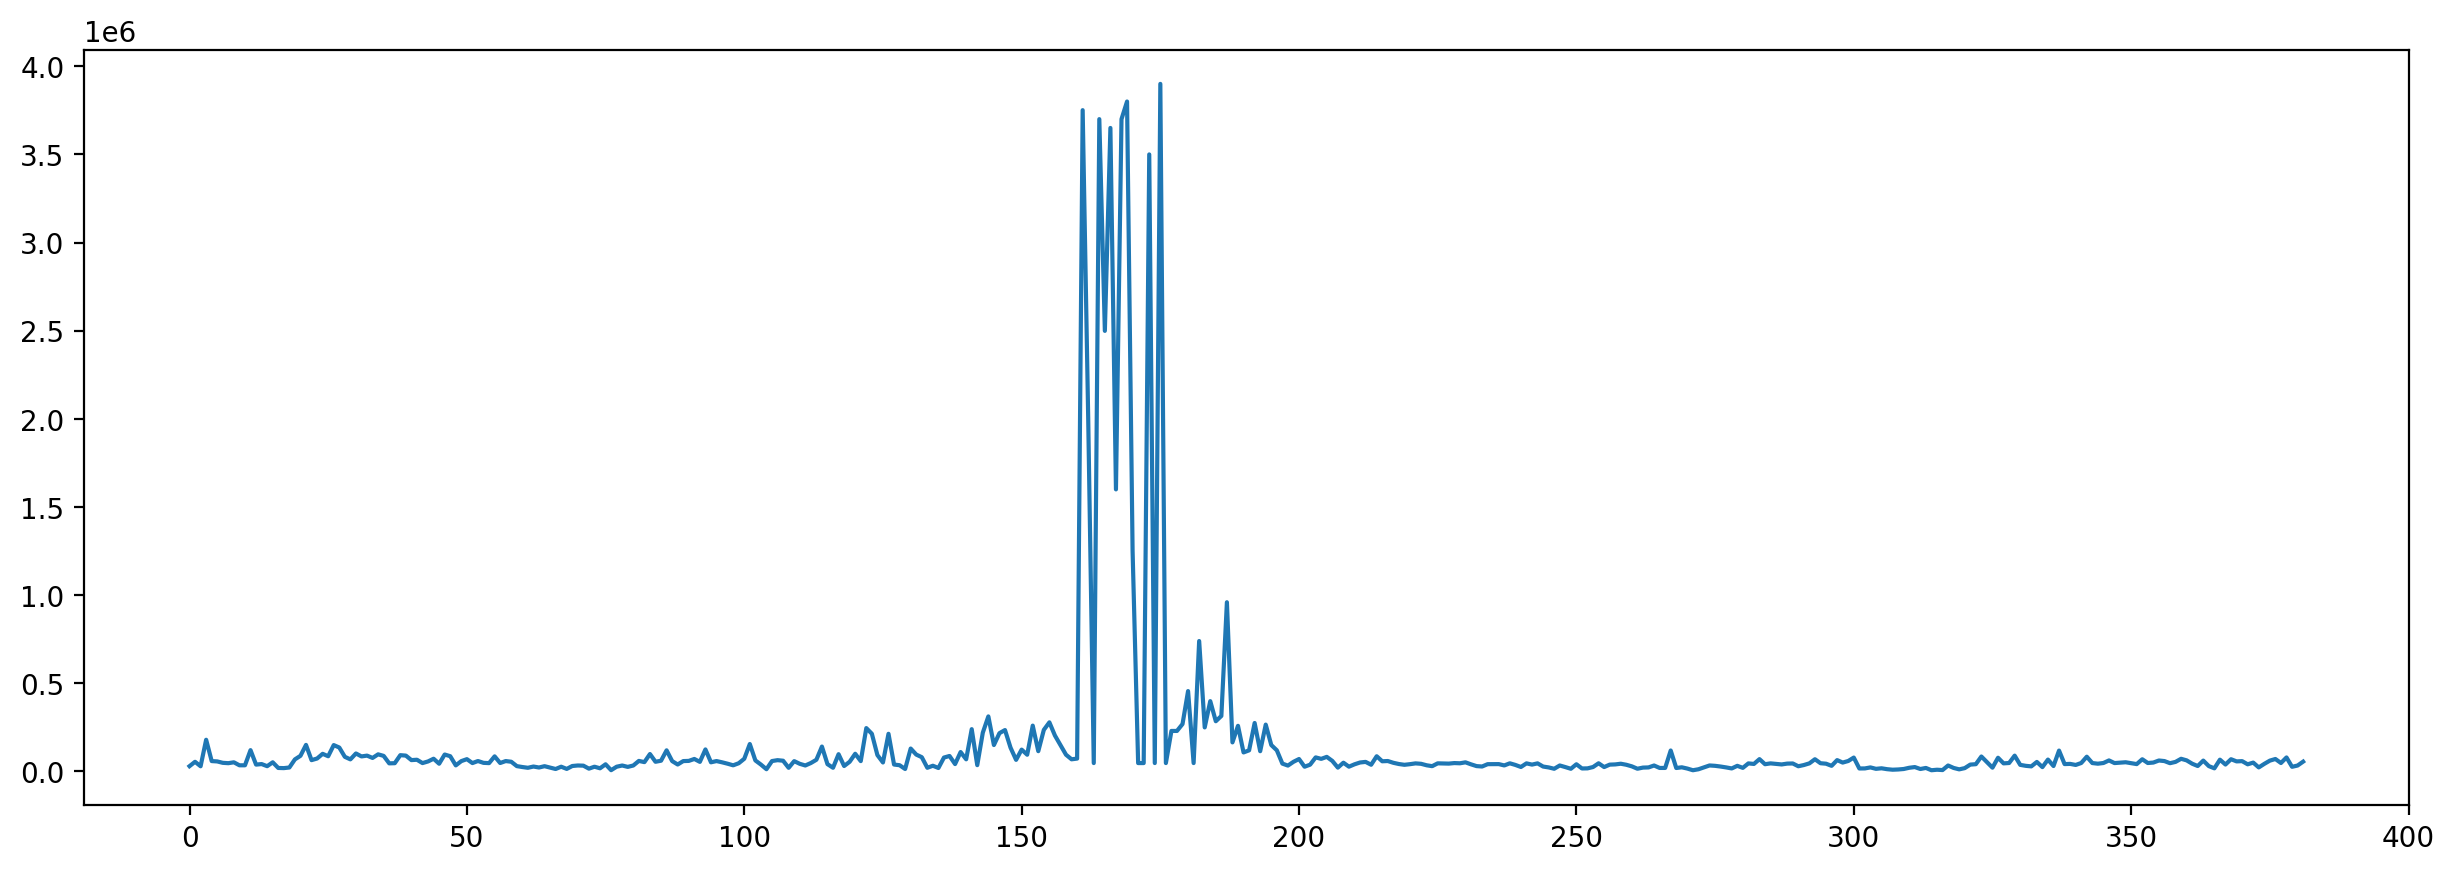

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200,figsize=(15,5))

cars["Final Price"]=cars["Final Price"].astype(float)

plt.plot(cars["Final Price"])



plt.show()

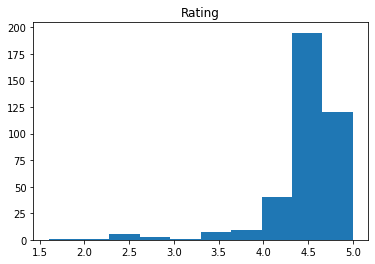

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.hist(cars["Rating"])
plt.title("Rating")
plt.show()

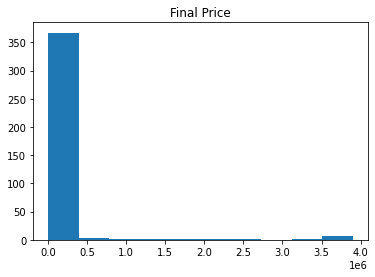

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.hist(cars["Final Price"])

plt.title("Final Price")

plt.show()

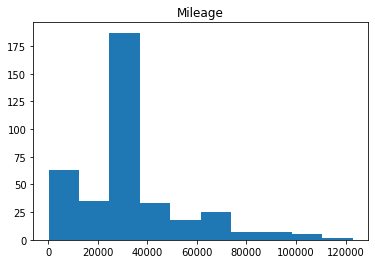

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.hist(cars["Mileage"])

plt.title("Mileage")

plt.show()

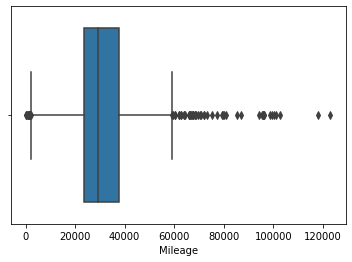

In [ ]:
sns.boxplot(cars["Mileage"])


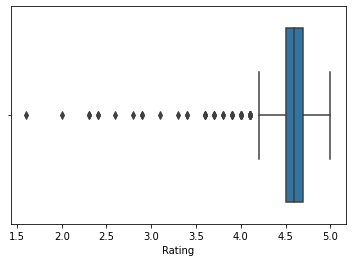

In [ ]:
sns.boxplot(cars["Rating"])


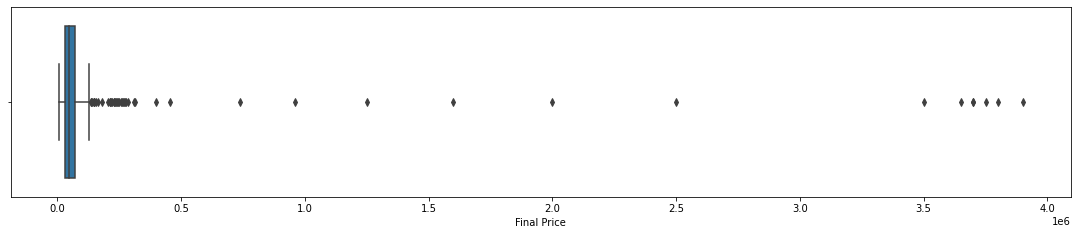

In [ ]:
plt.figure(figsize=(19,3.5))
sns.boxplot(cars["Final Price"])


Cat:

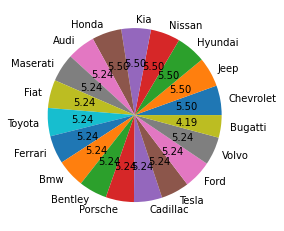

In [ ]:

import matplotlib.pyplot as plt

br=cars["Brand"].value_counts()

plt.pie(br, labels = br.index, autopct = '%.2f')

plt.show()

Brand
Audi         5.210500e+04
Bentley      1.655271e+05
Bmw          9.080075e+04
Bugatti      2.099235e+06
Cadillac     6.070045e+04
Chevrolet    5.230181e+04
Ferrari      2.879345e+05
Fiat         1.640915e+04
Ford         5.894625e+04
Honda        4.105467e+04
Hyundai      2.531705e+04
Jeep         5.439100e+04
Kia          3.175705e+04
Maserati     5.089690e+04
Nissan       2.721838e+04
Porsche      8.664945e+04
Tesla        6.379930e+04
Toyota       4.879235e+04
Volvo        4.827190e+04
Name: Final Price, dtype: float64
['Audi' 'Bmw' 'Ford' 'Hyundai' 'Tesla' 'Cadillac' 'Porsche' 'Bentley'
 'Bugatti' 'Ferrari' 'Chevrolet' 'Honda' 'Kia' 'Nissan' 'Toyota' 'Fiat'
 'Maserati' 'Jeep' 'Volvo']
['Chevrolet 52105.0', 'Jeep 165527.15', 'Hyundai 90800.75', 'Nissan 2099235.3125', 'Kia 60700.45', 'Honda 52301.80952380953', 'Audi 287934.5', 'Maserati 16409.15', 'Fiat 58946.25', 'Toyota 41054.666666666664', 'Ferrari 25317.04761904762', 'Bmw 54391.0', 'Bentley 31757.04761904762', 'Porsche 5089

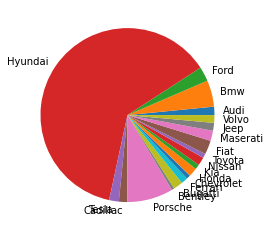

In [ ]:
l1=cars.groupby("Brand")["Final Price"].mean()

print(l1)
print(cars["Brand"].unique())

label=list(br.index.astype(str)+" "+l1.astype(str))

plt.pie(l1,labels = cars["Brand"].unique())

print(label)

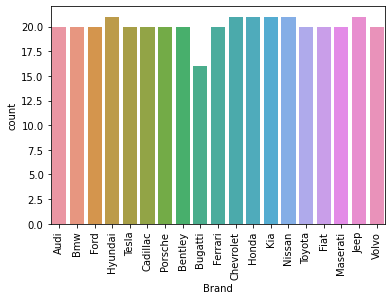

In [ ]:

sns.countplot(x='Brand',data=cars,)
plt.xticks(rotation=90)

plt.show()


####Bivariate:


Num vs Num:

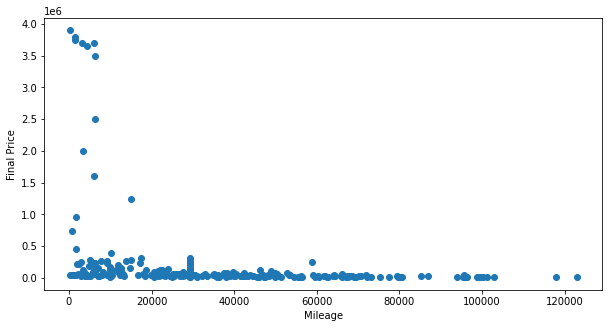

In [ ]:

plt.figure(figsize=(10,5))
plt.scatter(cars["Mileage"],cars["Final Price"])

ax=plt.axes()
plt.xlabel("Mileage")
plt.ylabel("Final Price")

plt.show()

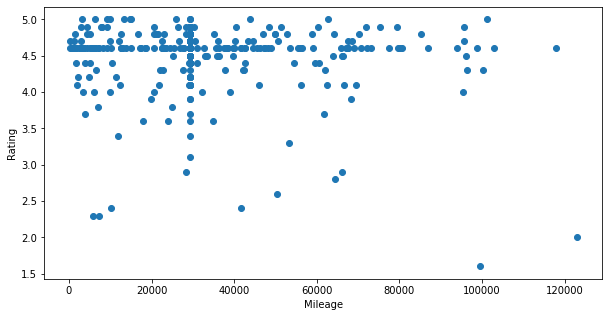

In [ ]:

plt.figure(figsize=(10,5))
plt.scatter(cars["Mileage"],cars["Rating"])

ax=plt.axes()
plt.xlabel("Mileage")
plt.ylabel("Rating")

plt.show()

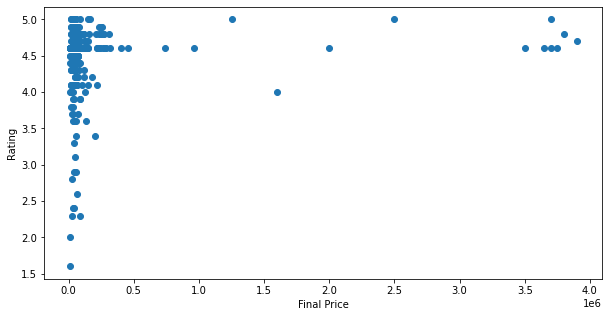

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(cars["Final Price"],cars["Rating"])

ax=plt.axes()
plt.xlabel("Final Price")
plt.ylabel("Rating")

plt.show()

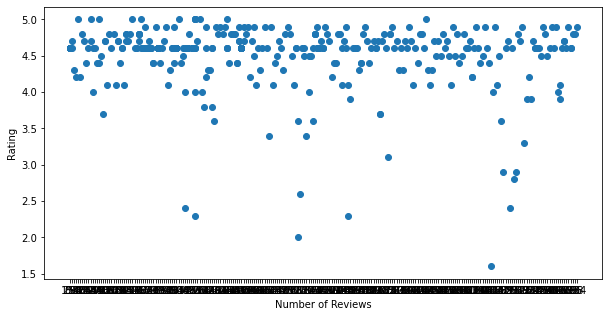

In [ ]:

plt.figure(figsize=(10,5))
plt.scatter(cars["Number of Reviews"],cars["Rating"])

ax=plt.axes()
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")

plt.show()

Num vs Cat:

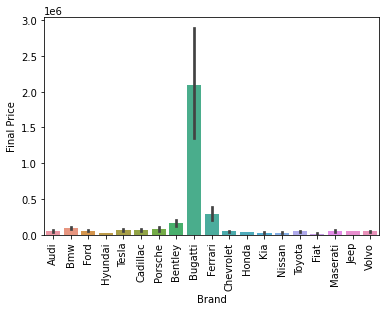

In [ ]:
sns.barplot(cars["Brand"],cars["Final Price"])

plt.xticks(rotation=90)

plt.show()

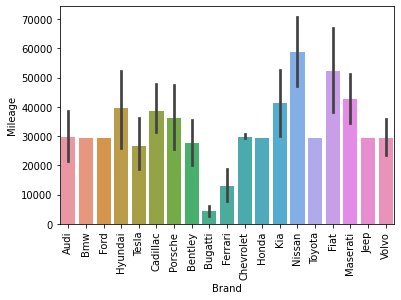

In [ ]:

sns.barplot(cars["Brand"],cars["Mileage"])

plt.xticks(rotation=90)

plt.show()

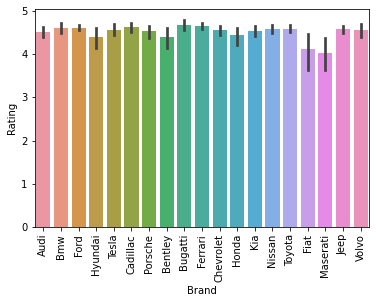

In [ ]:

sns.barplot(cars["Brand"],cars["Rating"])

plt.xticks(rotation=90)

plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

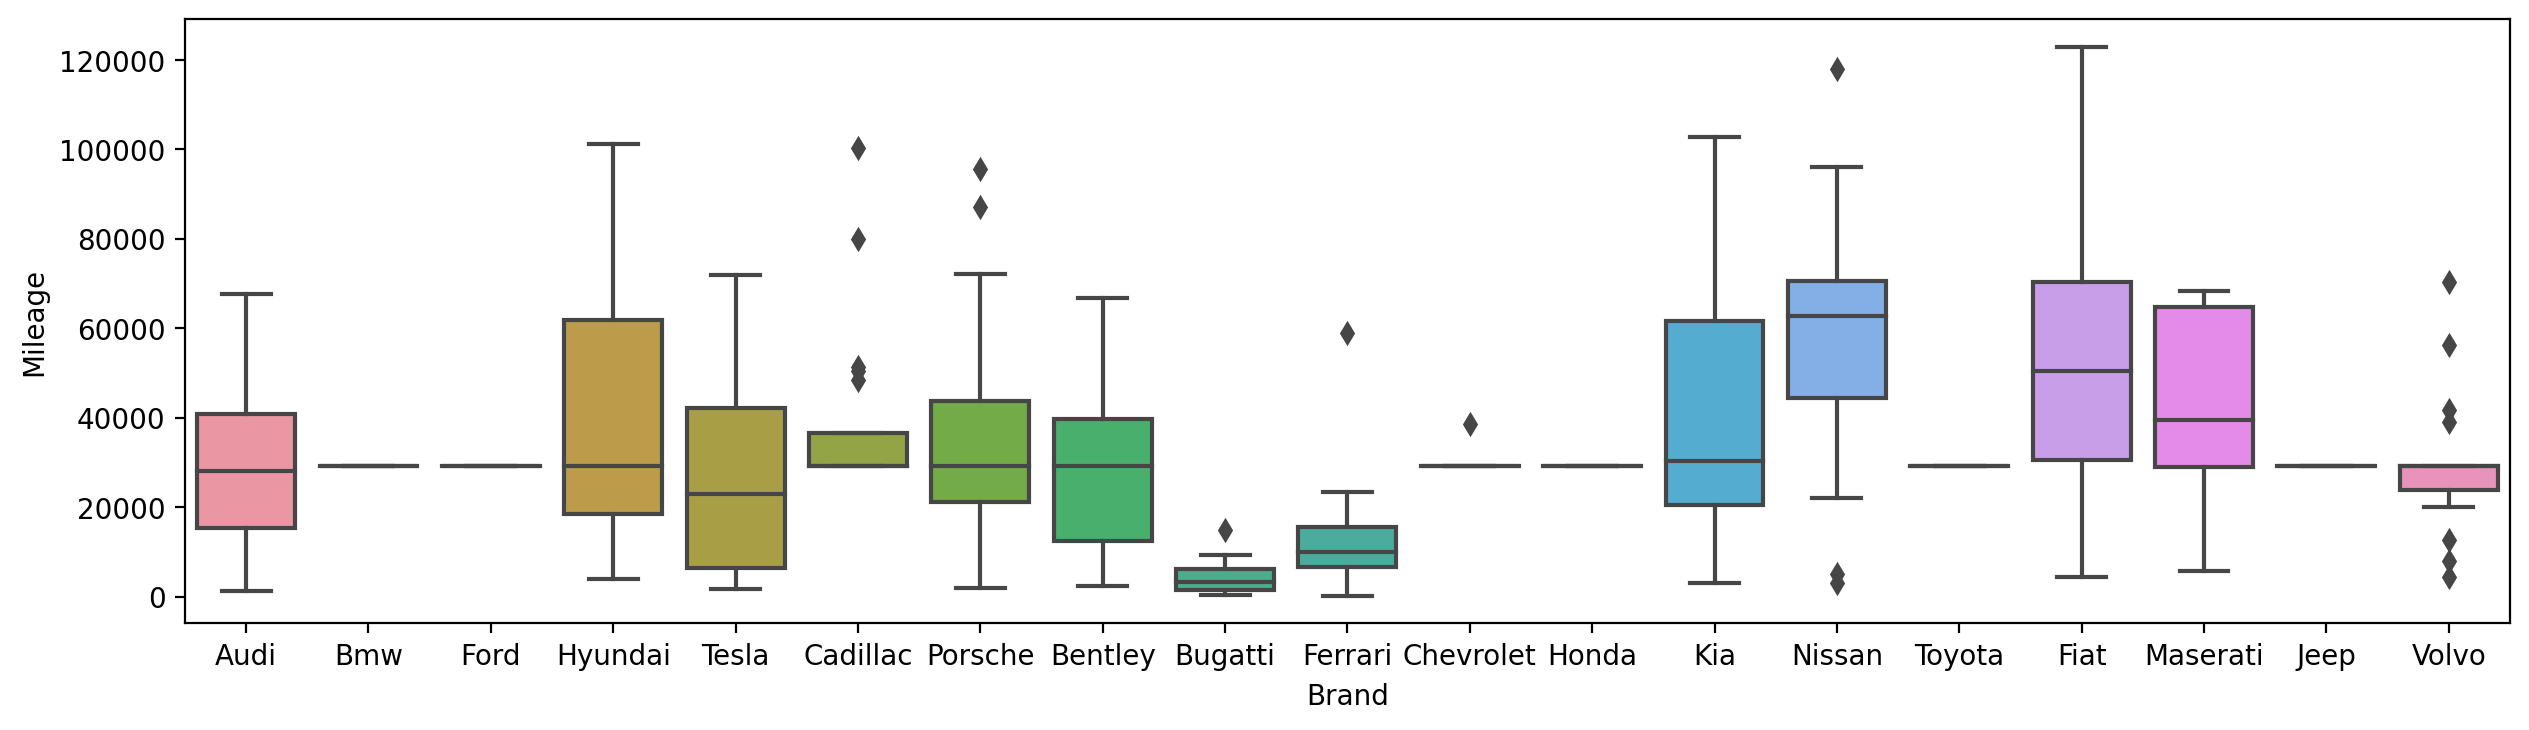

In [ ]:
plt.figure(dpi=200,figsize=(15,4))

cars["Mileage"]=cars["Mileage"].astype(float)
sns.boxplot(x=cars["Brand"],y=cars["Mileage"])
plt.show

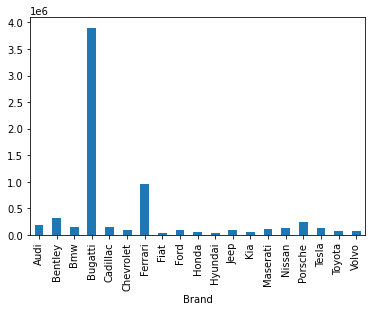

In [ ]:
cars["Final Price"]=cars["Final Price"].astype(float)
cars.groupby("Brand")["Final Price"].max().plot(kind="bar")

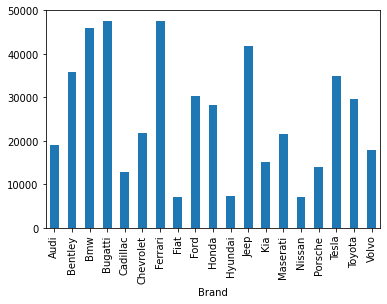

In [ ]:

cars["Final Price"]=cars["Final Price"].astype(float)
cars.groupby("Brand")["Final Price"].min().plot(kind="bar")

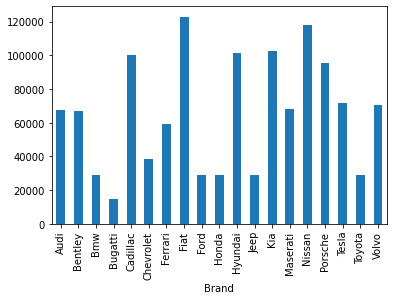

In [ ]:
cars["Mileage"]=cars["Mileage"].astype(float)
cars.groupby("Brand")["Mileage"].max().plot(kind="bar")


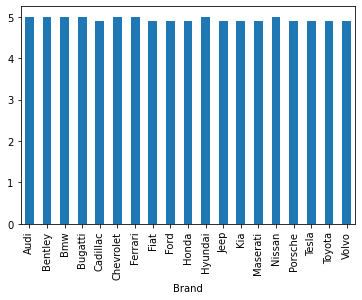

In [ ]:
cars["Rating"]=cars["Rating"].astype(float)
cars.groupby("Brand")["Rating"].max().plot(kind="bar")